# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре).
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты

import torch
import numpy as np

from torch import nn
from torch import optim

import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

train_dataset = torchvision.datasets.CIFAR100(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

image, label = train_dataset[30]
print (image.size())
print (label)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/
Files already downloaded and verified
torch.Size([3, 32, 32])
8


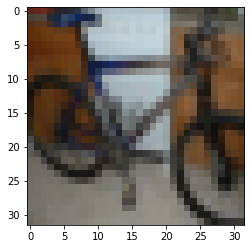

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())
plt.show()

In [4]:
batch_size = 32

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size,
                                          shuffle=False)

In [5]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [25]:
def LeakyRelu(input):
    return torch.max(0.1*input, 0.5*input)

In [26]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 5 * hidden_dim)
        self.fc2 = nn.Linear(5 * hidden_dim, 3 * hidden_dim)
        self.fc3 = nn.Linear(3 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = LeakyRelu(x)
        x = self.fc2(x)
        x = LeakyRelu(x)
        x = self.fc3(x)
        x = LeakyRelu(x)
        x = self.fc4(x)
        return x


net = Net(3072, 200, 100)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.05, momentum=0.9)

In [ ]:
# Запустить обучение (по аналогии с тем, что делали на паре)

In [28]:
from tqdm import tqdm
for epoch in tqdm(range(10)):  
    running_loss = 0.0
    print()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 500 == 0:  
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0
            

print('\nTraining is finished!')

  0%|          | 0/10 [00:00<?, ?it/s]


[1,     1] loss: 0.009
[1,   501] loss: 4.579
[1,  1001] loss: 4.199
[1,  1501] loss: 4.035


 10%|█         | 1/10 [00:48<07:13, 48.21s/it]


[2,     1] loss: 0.008
[2,   501] loss: 3.901
[2,  1001] loss: 3.798
[2,  1501] loss: 3.737


 20%|██        | 2/10 [01:36<06:25, 48.13s/it]


[3,     1] loss: 0.006
[3,   501] loss: 3.639
[3,  1001] loss: 3.621
[3,  1501] loss: 3.589


 30%|███       | 3/10 [02:23<05:35, 47.90s/it]


[4,     1] loss: 0.007
[4,   501] loss: 3.531
[4,  1001] loss: 3.500
[4,  1501] loss: 3.497


 40%|████      | 4/10 [03:11<04:46, 47.71s/it]


[5,     1] loss: 0.006
[5,   501] loss: 3.434
[5,  1001] loss: 3.409
[5,  1501] loss: 3.432


 50%|█████     | 5/10 [03:58<03:58, 47.66s/it]


[6,     1] loss: 0.008
[6,   501] loss: 3.345
[6,  1001] loss: 3.366
[6,  1501] loss: 3.367


 60%|██████    | 6/10 [04:46<03:10, 47.66s/it]


[7,     1] loss: 0.006
[7,   501] loss: 3.300
[7,  1001] loss: 3.322
[7,  1501] loss: 3.351


 70%|███████   | 7/10 [05:34<02:23, 47.73s/it]


[8,     1] loss: 0.007
[8,   501] loss: 3.256
[8,  1001] loss: 3.278
[8,  1501] loss: 3.293


 80%|████████  | 8/10 [06:22<01:35, 47.69s/it]


[9,     1] loss: 0.006
[9,   501] loss: 3.226
[9,  1001] loss: 3.252
[9,  1501] loss: 3.253


 90%|█████████ | 9/10 [07:09<00:47, 47.76s/it]


[10,     1] loss: 0.007
[10,   501] loss: 3.182
[10,  1001] loss: 3.231
[10,  1501] loss: 3.221


100%|██████████| 10/10 [07:57<00:00, 47.75s/it]


Training is finished!
